# 1. Data I/O Settings

In [1]:
#Directory data loading parameters - training data
hindcast_directory = 'test_data/hindcasts/'              #name of directory with separate ncdf files for observations and each model 
hcst_observations_file = 'chirps_hindcast.nc'    #name of file within ncdf_directory with observations data
hindcast_export_file = 'tanzania.nc'

#Directory data loading parameters - forecast data
forecast_directory = 'test_data/forecasts/'              #name of directory with separate ncdf files for observations and each model 
fcst_observations_file = 'chirps_forecast.nc' #or 'None'
forecast_export_file = 'tanzania_fcst.nc'

#shared loading parameters
latitude_key = 'Y'                        #name of latitude coordinate in your ncdf file
longitude_key='X'                         #name of longitude coordinate in your ncdf file 
time_key = 'S'                            #name of time coordinate in your ncdf file 
obs_time_key = 'T'


# 2. MME Skill Evaluation
#### 2a. Analysis Settings

In [2]:
#analysis parameters 
mme_methodologies = ['EM', 'MLR', 'ELM' ] #'MLR', 'PCR', 'SVD', 'ELM', 'EWP',list of MME methodologies to use - available: ['EM', 'MLR', 'ELM', 'Ridge'] 'SLFN' also works but is slow for 2D data
skill_metrics = ['SpearmanCoef', 'PearsonCoef', 'RMSE', 'MSE',  'MAE', 'IOA'] #list of metrics to compute - available: ['SpearmanCoef', 'SpearmanP', 'PearsonCoef', 'PearsonP', 'MSE', 'MAE', 'RMSE', 'IOA']

#### 2b. Model Parameters

In [3]:
args = {
    #EnsembleMean settings
    'em_xval_window': 1,               #odd number - behavior undefined for even number

    #MLR Settings
    'mlr_fit_intercept': True,         #Whether to calculate the intercept for this model. If set to False, no intercept will be used in calculations (i.e. data is expected to be centered) (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
    'mlr_xval_window': 1,               #odd number - behavior undefined for even number
    'mlr_standardization': None,        #'std_anomaly' or None

    #ELM Settings 
    'elm_xval_window': 1,              #odd number - behavior undefined for even number
    'elm_hidden_layer_neurons':3,     #number of hidden layer neurons - overridden if using PCA init
    'elm_activation': 'sigm',          #“lin” for linear, “sigm” or “tanh” for non-linear, “rbf_l1”, “rbf_l2” or “rbf_linf” for radial basis function neurons (https://hpelm.readthedocs.io/en/latest/api/elm.html)
    'elm_standardization' : 'minmax',  #'minmax' or 'std_anomaly' or None
    'elm_minmax_range': [-1, 1]        #choose [minimum, maximum] values for minmax scaling. ignored if not using minmax scaling
}


#### 2c. Model Construction


In [4]:
from src import * 

reader = Reader()  #Object that will handle our input data
data = reader.read_multiple_ncdf(hindcast_directory, observations_filename=hcst_observations_file, latitude_key=latitude_key, longitude_key=longitude_key,obs_time_key=obs_time_key, time_key=time_key)
mme = MME(data)
mme.train_mmes(mme_methodologies, args)


Computing MMEs
EM [*************************]
MLR [*************************]
ELM [*************************]


#### 2d. Skill Evaluation

In [5]:
mme.measure_skill(skill_metrics)


Analyzing Skill
SpearmanCoef
  ELM [*************************]
  EM [*************************]
  MLR [*************************]
  Model1 [*************************]
  Model2 [*************************]
  Model3 [*************************]
  Obs [*************************]
PearsonCoef
  ELM [*************************]
  EM [*************************]
  MLR [*************************]
  Model1 [*************************]
  Model2 [*************************]
  Model3 [*************************]
  Obs [*************************]
RMSE
  ELM [*************************]
  EM [*************************]
  MLR [*************************]
  Model1 [*************************]
  Model2 [*************************]
  Model3 [*************************]
  Obs [*************************]
MSE
  ELM [*************************]
  EM [*************************]
  MLR [*************************]
  Model1 [*************************]
  Model2 [*************************]
  Model3 [*************************]

#### 2e. Cross-Validated Hindcast Skill Maps 

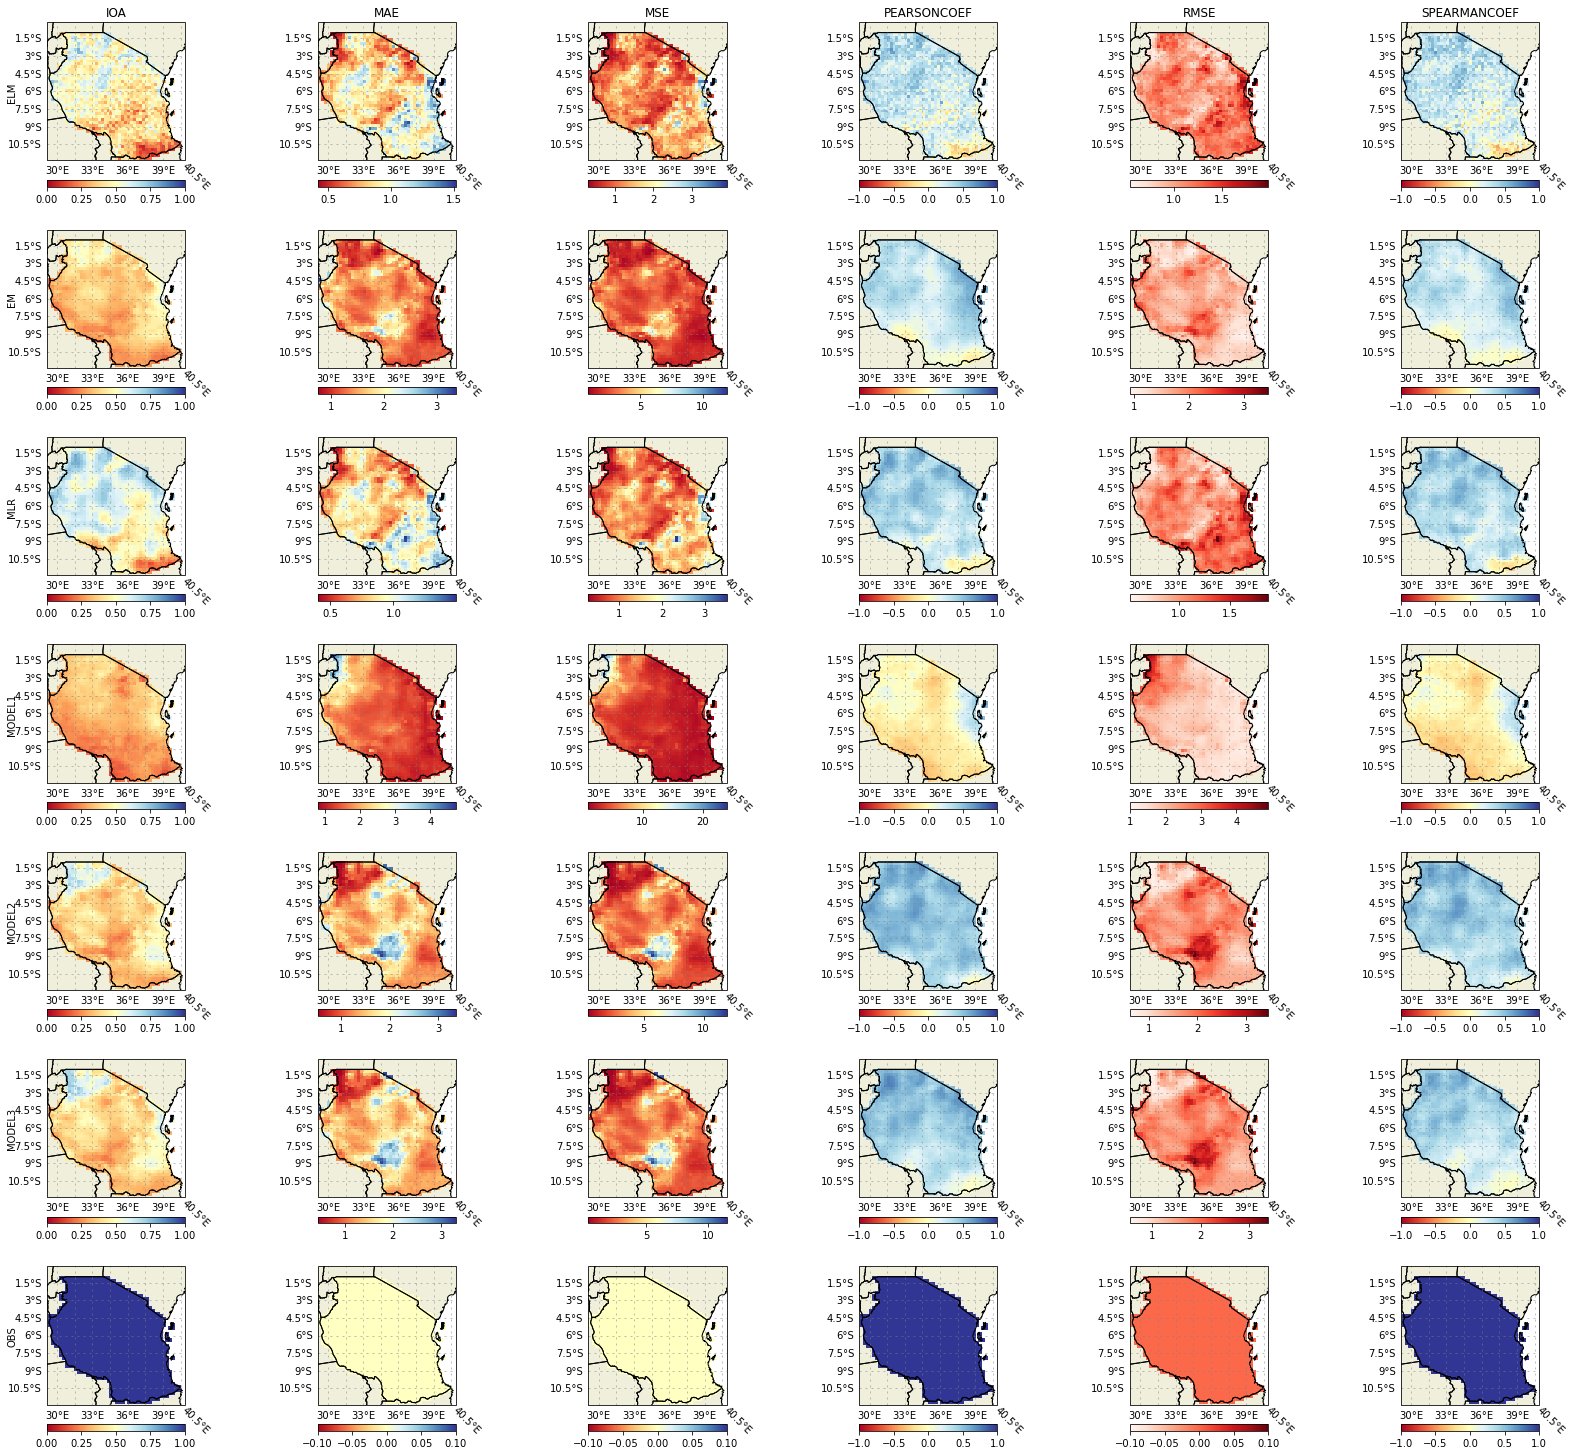

In [6]:
ptr = Plotter(mme)
ptr.map_skill(methods=mme_methodologies, metrics=skill_metrics, members=True, obs=True)

#### 2e. Cross-Validated Hindcast Single-Point Analysis

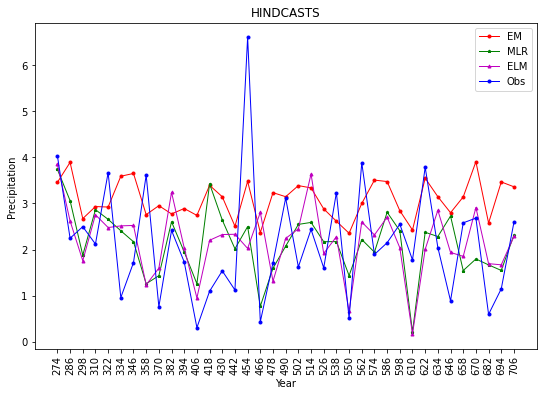

In [7]:
ptr.timeline(methods=mme_methodologies, members=False, obs=True, point=[-6, 36]) #point in degrees lat/long

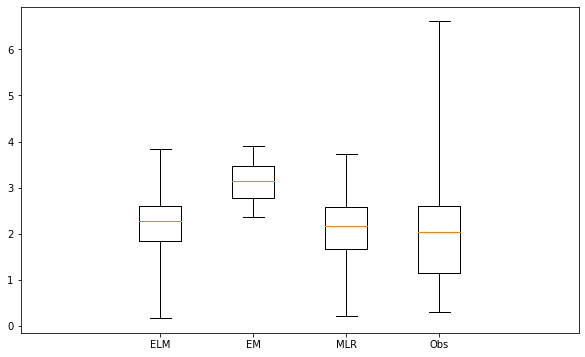

In [8]:
ptr.box_plot(methods=mme_methodologies, members=False, obs=True, point=[-6, 36]) #point in degrees lat/long

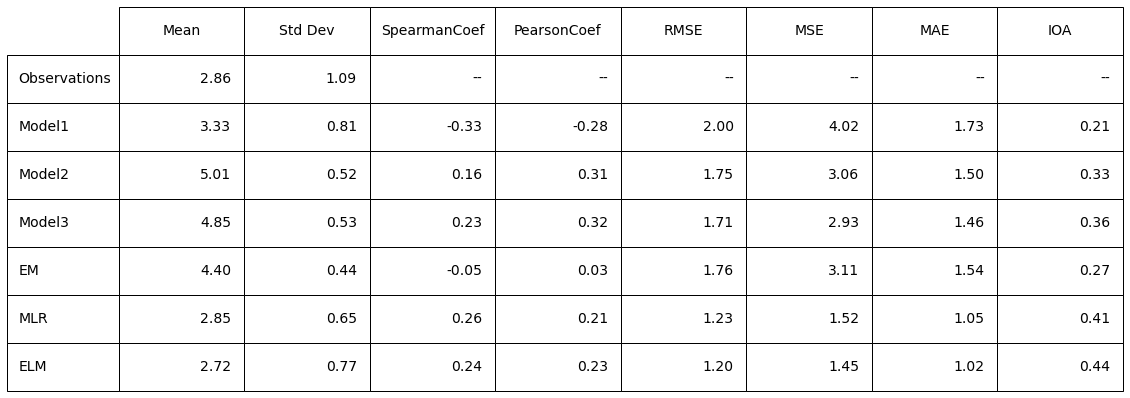

In [9]:
ptr.skill_matrix(methods=mme_methodologies, metrics=skill_metrics, members=True, obs=True, point=[-9, 34]) #point in degrees lat/long

#### 2f. Saving MME - Do Not Edit

In [10]:
mme.export_ncdf(hindcast_export_file)

saved to tanzania.nc


# 4. Real Time Forecasting
#### 4a. Real Time Forecast Settings

In [11]:
#forecast analysis parameters 
forecast_methodologies = ['EM', 'MLR', 'ELM' ]

In [12]:
fcst_data = reader.read_multiple_ncdf(forecast_directory, observations_filename=fcst_observations_file, latitude_key=latitude_key, longitude_key=longitude_key,obs_time_key=obs_time_key, time_key=time_key)
mme.add_forecast(fcst_data)
mme.train_rtf_models(forecast_methodologies, args)
mme.make_RTFs(forecast_methodologies)


Training RTF Models
EM [*************************]
MLR [*************************]
ELM [*************************]


#### 4b. Deterministic Forecasts

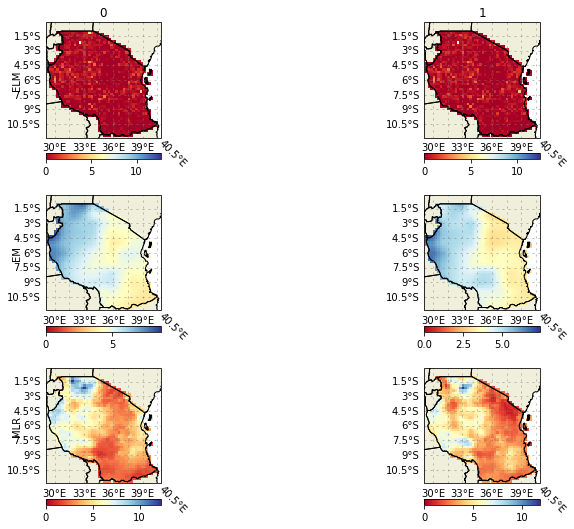

In [13]:
ptr.map_forecasts(methods=mme_methodologies, fcst='forecasts', obs=False,  members=False)

#### 4b. Deterministic Forecasts - Pointwise Analysis

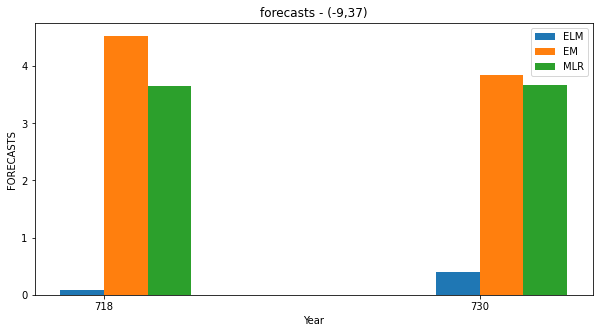

In [14]:
ptr.bar_plot(methods=mme_methodologies, fcst='forecasts', members=False, obs=False, point=[-9,37])